# Portland TRIMET Project Description
There  are three data groups: Redfin Housing Data,911 Call Data and trimet light trail data. Based on these data groups, try to find the correlation with property value and crime rate  neighborhood,, correlation between total calls and average response call by neighborhood, which line has the highest average house sale price in all neighborhoods that have trimet.
## Data Sources:
911 Call Data:        Trimet lightrail selected 911 calls 
Redfin Housing Data:  single family home sales
Trimet Events, Trimet Vehicle data by hour, day, week,month




In [122]:
import pandas as pd
import numpy as np
#import scipy
#import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
sns.set()
%matplotlib inline

In [2]:
# get 911-call data
data_911 =pd.read_csv('911-calls.csv',delimiter=',')
data_911.head()

Unnamed: 0  Call Number Call Category Call Group         Neighborhood  \
0           0   2296401412        TriMet   Disorder    Hosford-Abernethy   
1           1   2392175033        TriMet   Disorder    Hosford-Abernethy   
2           2   2570595016        TriMet   Disorder    Hosford-Abernethy   
3           3   2188786224        TriMet   Disorder  Powellhurst-Gilbert   
4           4   2309187422        TriMet   Disorder        Foster-Powell   

             Report Date  Response Time (sec)  Time In Queue (sec)  \
0    7/4/2017 8:33:30 PM                 42.0                 42.0   
1  12/18/2017 7:13:27 PM                692.0                 49.0   
2   4/8/2018 10:25:38 AM               2193.0               1156.0   
3    9/2/2017 8:55:42 AM               1140.0               1003.0   
4   8/5/2017 12:03:42 PM                797.0                 90.0   

   Travel Time (sec)  
0                0.0  
1              643.0  
2             1037.0  
3              137.0  
4              707.0

In [3]:
# 911-calls data start date
call_start_date = data_911["Report Date"].max()

In [4]:
print(call_start_date)

9/9/2017 7:17:03 PM


In [5]:
# 911-calls data end date
call_end_date = data_911["Report Date"].min()
print(call_end_date)

1/1/2018 10:24:42 AM


In [6]:
#clean data drop NAN and order by Neighborhood
data_911_drop =data_911.dropna().drop_duplicates().sort_values(['Neighborhood'])
#data_911_drop.shape

In [7]:
print(data_911_drop.head())

      Unnamed: 0  Call Number Call Category Call Group Neighborhood  \
1077        1077   2026141516        TriMet   Disorder  Arbor Lodge   
1488        1488   2316103632        TriMet   Disorder  Arbor Lodge   
1487        1487   2030209614        TriMet   Disorder  Arbor Lodge   
1975        1975   2468969412        TriMet   Disorder  Arbor Lodge   
1974        1974   2095314016        TriMet   Disorder  Arbor Lodge   

               Report Date  Response Time (sec)  Time In Queue (sec)  \
1077  6/13/2017 6:27:37 PM                104.0                101.0   
1488  11/6/2017 7:22:30 PM                652.0                 65.0   
1487  6/15/2017 1:43:27 PM               1203.0                 59.0   
1975  1/29/2018 2:25:23 PM               1459.0                 57.0   
1974  7/16/2017 3:39:44 PM                811.0                 47.0   

      Travel Time (sec)  
1077                3.0  
1488              587.0  
1487             1144.0  
1975             1402.0  
1974      

In [8]:
#neighborhood number
neighborhoods = data_911_drop['Neighborhood'].unique()
print(neighborhoods)


['Arbor Lodge' 'Ardenwald' 'Argay' 'Arlington Heights' 'Beaumont-Wilshire'
 'Boise' 'Brentwood-Darlington' 'Bridlemile' 'Brooklyn' 'Buckman East'
 'Buckman West' 'Cathedral Park' 'Centennial' 'Concordia'
 'Creston-Kenilworth' 'Cully' 'Downtown' 'Eastmoreland' 'Eliot'
 'Far Southwest' 'Forest Park' 'Foster-Powell' 'Glenfair' 'Goose Hollow'
 'Grant Park' 'Hayden Island' 'Hazelwood' 'Hillsdale' 'Hillside'
 'Hollywood' 'Homestead' 'Hosford-Abernethy' 'Humboldt' 'Irvington'
 'Kenton' 'Kerns' 'King' 'Laurelhurst' 'Lents' 'Linnton' 'Lloyd'
 'Madison South' 'Maplewood' 'Mill Park' 'Montavilla' 'Mt Scott-Arleta'
 'Mt Tabor' 'Multnomah' 'North Tabor' 'Northwest' 'Northwest Industrial'
 'Old Town/Chinatown' 'Overlook' 'Parkrose' 'Parkrose Heights' 'Pearl'
 'Piedmont' 'Portsmouth' 'Powellhurst-Gilbert' 'Reed' 'Richmond'
 'Rose City Park' 'Roseway' 'Sellwood-Moreland' 'South Portland'
 'South Tabor' 'Southwest Hills' 'St Johns' "Sullivan's Gulch" 'Sumner'
 'Sunnyside' 'Sylvan-Highlands' 'University

In [9]:
total_neighborhood_911 = len(neighborhoods)
print("There are total " + str(total_neighborhood_911)+" total_neighborhood")

There are total 79 total_neighborhood


Response Time (sec)  Time In Queue (sec)  Travel Time (sec)
count          3145.000000          3145.000000        3145.000000
mean            813.887758           273.331638         540.556121
std             965.621605           761.537463         560.337422
min               3.000000             3.000000           0.000000
25%             309.000000            48.000000         199.000000
50%             557.000000            75.000000         399.000000
75%             958.000000           154.000000         714.000000
max           12327.000000         12317.000000       10096.000000

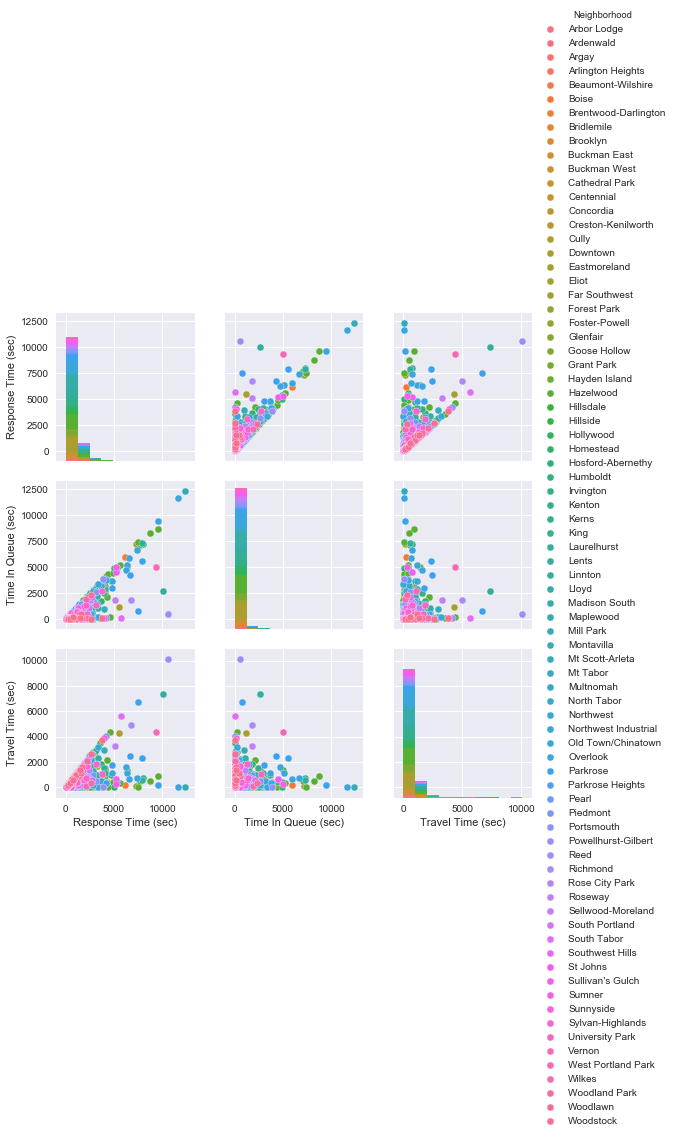

In [10]:
# Visualize pairplot of data_911_drop
features_911=["Neighborhood","Response Time (sec)","Time In Queue (sec)","Travel Time (sec)"]
sns.pairplot(data_911_drop[features_911], hue="Neighborhood");
data_911_drop[features_911].describe()


In [11]:
# 911_calls by neighborhood group
call_byneighborhood =data_911_drop.groupby(['Neighborhood'], as_index=False)

In [12]:
# Total 911_calls per neighborhood group

total_call =call_byneighborhood.count()[["Neighborhood","Call Number"]]
total_call =total_call.rename(index=str,columns={"Call Number": "Total calls"})

In [13]:
print(total_call.head())


        Neighborhood  Total calls
0        Arbor Lodge           35
1          Ardenwald           17
2              Argay            2
3  Arlington Heights            2
4  Beaumont-Wilshire            2


Text(0,0.5,'Total Calls of 911 Calls per Neighborhood')

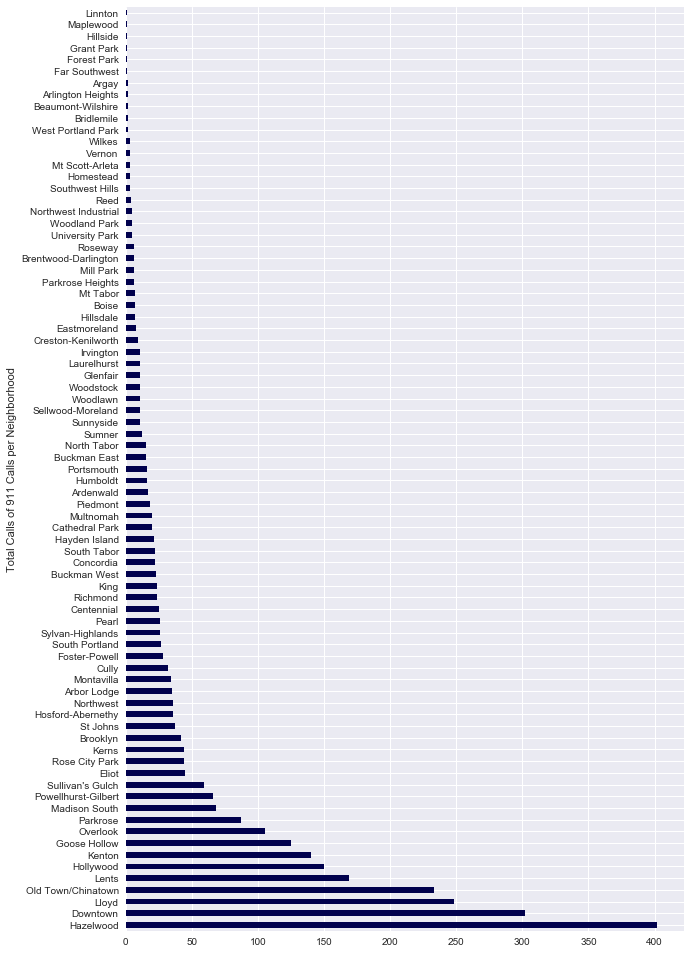

In [14]:
# Show total trimet related 911 calls per neighborhood
total_call.set_index("Neighborhood").sort_values("Total calls",ascending=False).plot(kind='barh',figsize=(10,17),cmap='seismic',legend=False)
plt.ylabel('Total Calls of 911 Calls per Neighborhood')

In [15]:
print("The  highest trimet related 911 calls is " + str(total_call["Total calls"].max())+ " in the Hazelwood neighborhood ")

The  highest trimet related 911 calls is 402 in the Hazelwood neighborhood 


In [16]:
# average 911-calls response time per beighborhood
call_response=call_byneighborhood["Response Time (sec)"].mean()
print(call_response.head())

        Neighborhood  Response Time (sec)
0        Arbor Lodge           771.742857
1          Ardenwald          1137.588235
2              Argay          1354.000000
3  Arlington Heights          1826.000000
4  Beaumont-Wilshire          2950.000000


In [17]:
#Show average resonse time per call per Neighborhood

Text(0,0.5,'Average 911-calls response time(sec) per beighborhood')

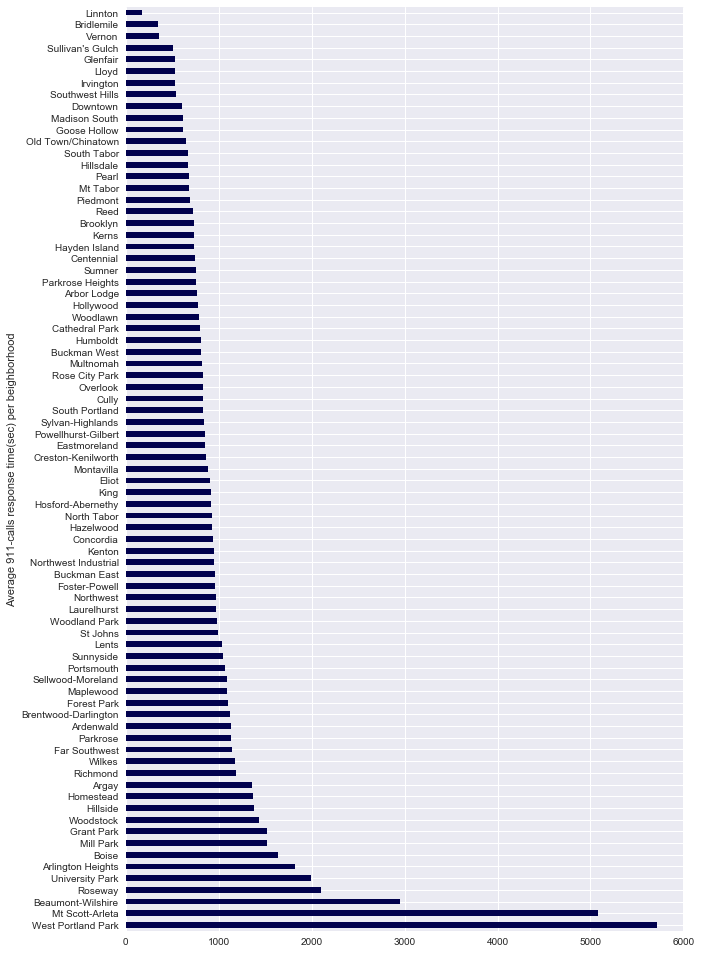

In [18]:
call_response.set_index("Neighborhood").sort_values("Response Time (sec)",ascending=False).plot(kind='barh',figsize=(10,17),cmap='seismic',legend=False)
plt.ylabel("Average 911-calls response time(sec) per beighborhood")

In [19]:
print("The longest average response time " + str(call_response["Response Time (sec)"].max())+ "(s) is in the West Portland Park neighborhood")

The longest average response time 5718.0(s) is in the West Portland Park neighborhood


In [20]:
#Compare total calls and response time per neighborhood
call_response_count= pd.merge(call_response, total_call, how="left", on="Neighborhood")

In [21]:
# Change Response time to min
call_response_count ["Response Time (sec)"] = call_response_count ["Response Time (sec)"]/60

In [22]:
#change columns name Response Time (sec) to Response Time (min)
call_response_count =call_response_count.rename(index=str,columns={"Response Time (sec)": "Response Time (min)"})
call_response_count.head()

Neighborhood  Response Time (min)  Total calls
0        Arbor Lodge            12.862381           35
1          Ardenwald            18.959804           17
2              Argay            22.566667            2
3  Arlington Heights            30.433333            2
4  Beaumont-Wilshire            49.166667            2

In [23]:
#Show total calls and average response time per call
show_call_result =call_response_count.set_index("Neighborhood").sort_values("Total calls",ascending=False)
show_call_result.head()

Response Time (min)  Total calls
Neighborhood                                        
Hazelwood                     15.473839          402
Downtown                      10.158885          302
Lloyd                          8.900806          248
Old Town/Chinatown            10.716452          233
Lents                         17.299507          169

In [24]:
#show_call_result.plot(kind='bar',figsize=(30,10))
#plt.show()

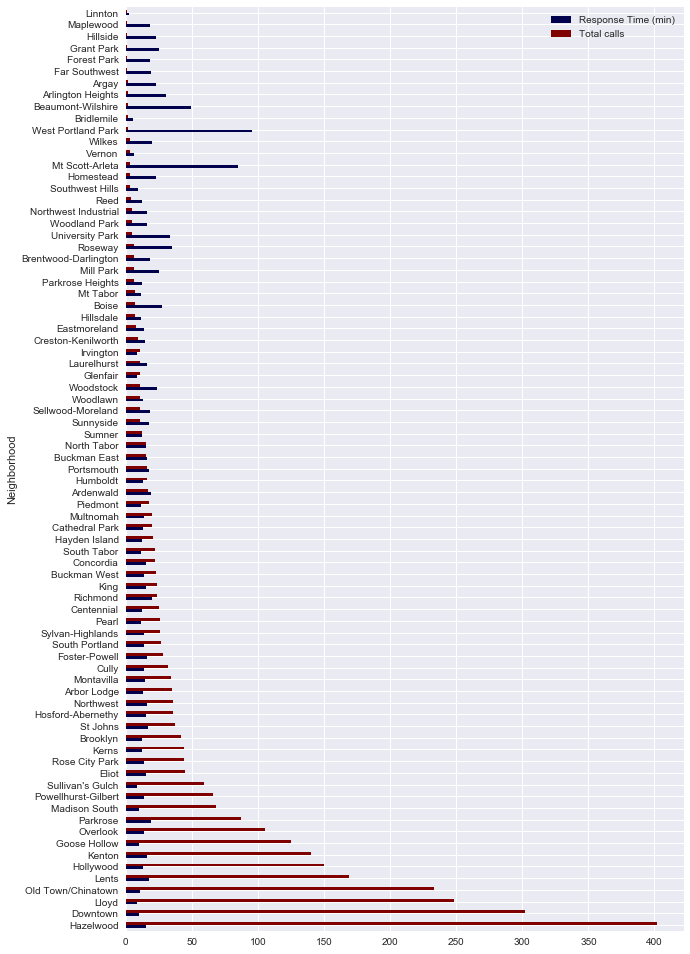

In [25]:
show_call_result.plot(kind='barh',figsize=(10,17),cmap='seismic')

Correclation between total calls and response time(s)


In [26]:
call_response_count_corr= pd.merge(call_response, total_call, how="left", on="Neighborhood")


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000006618160>,
      dtype=object)

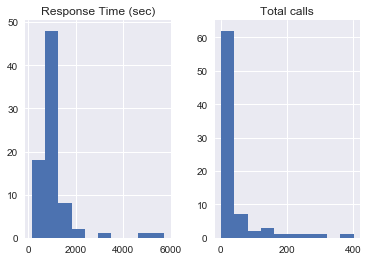

In [27]:
#show hist for "Response Time (s)" and "Total clls"
call_response_count_corr.hist()

In [28]:
#We should log to get correclation between total calls and response time(s)
call_response_count_corr_temp = call_response_count_corr.copy()
#lSeXbodgGSpKkxwCWpUAa4JBXKAJekQhngklQoA1ySCjW/2wW0KyKGgQ3AvcAwsAj4HfCazLyhm7V1QkQ8FrikntwF2Bm4o57+NHAP8JDMPHuG3v8vgI8Dx2Vmx84tjYh/Bs7KzB91apmaORHxEeCwevKxVPvgPfX0wZl5T5O/GwAuy8zDWyz/FGBpZj63A7VeB5xDlQs3ZOZDprvM0hQT4LWnZ+ZvRyYi4s3APwIHd6+kzsjMHwL7AkTEScALMnPpLJawEjizk+FdexdwSUQcPAPLVodl5utHHkfET4GXtdlA+jPggBkqS02UFuD3iYj5wCOA/2l47p3A86m6hn4KvDYzfxkRxwMrgG1ULfi3ZOY3IuJq4HvA04BdgYsy88x6Wc8FzqyXtRl4U2ZeHxHvBvYEHgbsAfwCOCEzfxURrwFeDfwR+APwqsz8Yd26/Whd7wLgc5n595Nc33cDu2bm6+oD6xLgGcAA8AHgEGB/4E/AsfV6t/W+EXEgsFtm/ns93Wx77QycBzy+Xt6V9byt9TI+AjywXv83Z+ZVmfmTiNgEHAt8aTLrrN4TEYup9redqP6d35mZ64FPAf0RcXNm7hsRrwROARZSfaP8u8z8RItlrwBOpNqHEziZah88H3gU1YfEXcBLMvP2Jsv4K6rGyI5AH3BBZl4wvbXuXaX1gX89In4QEb8EbqufOxkgIl5OFSxPycx9gX8BLqxf80GqMD8AOANY0rDMoAq//YAXR8TSiHgM1U7z/Mx8IlUr8ksR8eD6bw4FXpiZjwHuBl4dEfOADwNHZeaTgU9QfTAAXASsysz9gacAh0fEi6a5LXbKzIPq2j4BnFfX+nPgpEm+7wuByxumm22vfwBurJf3JKoPvTdFxALgi8B7M/NxwCuB8yJiZP9aDxw/zfVVl0XEIHApsLze15ZRfbt6BNVxuLkO7wfX847OzCcBLwPe32LZxwMvBQ6s96H/Al4DPAcYysyDMnMf4CZg+QSLeivwhXofXQosadgP55zSWuBPz8zfRsR+VAH99cz8TT1vKVVI3RARAPOo+skBPgesjYivAv9G1YIYcUFm/gnYFBGXAUdStVivzMyfAGTmVRHxG6oWLsDVmfm7+vFNwC6ZeW/999+q3+cKqp37gcBiYJeIeF/9Nw+i6i65dBrb4vP1/38M/Hdmfr9hepdJvu9jqLbRiGbbaynwlIj463r6AfX/Hw/cm5lfBcjMG+vnRtwBTPcDS913MPCjkS6VzLwlIr5LtZ99e+RFmfm7iDgGOCYi9qH6sH9Qi2UfDlyamZvqZZw6MiMibo+I11O1wg8DvjHBctYCqyLiYOBrwOszc9sk17MYRX4yZeb3gDcCqyNiz/rpecD7M3PfugV+AFXLmsx8J1Vr+Aaq1mnjDrC14fEOVF0G86h+KGXUvAX148YfcoapvqqRmScAxwC3A28HPlsvqw94akNtBwGT6kIZx/82PP7TOPMn877DNOwLE2yveVTfPEaWdyDwOqptuN32iojH1d1cI/XdO6m1Uy9qdVwAEBF7UDVs/hK4lupbXF+LZW+3D0XEQETsERF/S/UN8/fAxVSNj6bLyswvAo8G1lBlwIaIeFjLNStUkQEOkJmfBa6n+loPVYv3lIZujvcCF0XE/LrPeFFmng+8FnhCROxYv+6EiNih/hX9RcBXqPp2j4yIvQAi4hnA7sB3m9UTEbtGxM+BOzPzw1R9yE+uW+rfAd5Uv+4hwDeB4zqwGZqa5PsmsHf9uom21xXAGyOir57+MlWAJzAcEUfUy9gPuIr/378eCXgWSvm+BTwuIg4AiIjHUzWSrqYK4PkR0Qc8GfgVVWNhPVWjplXWfA14QUT019PvA06l+ka8KjNXAf9J9S1wXrOFRMSlwPF1PryGqotzr0mvaSGKDfDa64BnR8SRVP3dlwPfiYj/AJ4AnJSZW4E3UHVnfA+4DFiWmSMt2AdQfRB8B/hYZl5ZnxHyWuALEbEBOBs4JjPvalZIfXbMWcCVEXFj/TevrGe/FDgoIm6h+hD4bGZe3LnN0FS777sGOAqgxfZ6PdWPlLcAP6j//4F63vHAmRFxM9XvB8dn5h/r5R9VL0cFy8xfAy8GPl7vUxcBJ9Zdjb+ganVvoOp2G6L6YL8V+HNgY0TsPcGyv1wv79v1sneharl/EHhdRPwAuIbqW+GjJijzPcBJEfF9qmP60sz85tTXurf13Z+Hk63PQvloZq7pdi3dFhFXAGdk5vUdXu7eVF99PY1Q6rDSW+DqnFcB76q/AnfSWcAphrfUeffrFrgklcwWuCQVqq3zwCPiJqoroKA6p/cCqivytgLrM/M9M1OeJKmZlgEeETsBZOaShuduprpk/SfAVyNiv/rc7HENDW2+r59mYGARGzdumU7NXVVy/SXXDjA42N/p/vkZ1bjfNyr936FT3A6VibZDq32+nRb4E4FFEbG+fv27gR0z88dw39kLz6QaU6Sl+fObnsJZhJLrL7n2ucR/h4rboTKd7dBOgG+hGrLxQmAfYB2wqWH+ZlqcKD8wsGi7IgcH+yd4de8ruf6Sa5e0vXYC/Dbg9vo0sNsi4i6qk+xH9LN9oI/R+PVgcLCfoaHNUyi1N5Rcf8m1gx8+0mjtnIWyDPgQQEQ8nGqAqLsjYu/6nOEjqcY7kCTNonZa4J+kGjTqOqrBZpZRjdF7MdWYBOszs+kYIZKkmdEywOvxLF46zqyDOl+OJKldXsgjSYUywCWpUAa4JBXKAJekQpV2T0wAlp191aT/ZtXbnzEDlUiTd8xpX5r037j/ajy2wCWpUAa4JBXKAJekQhXZBy7NtIg4HTgWWAh8jOqGuquprkbeACzPzG1dK1DCFrg0RkQsAZ4KHAIsBnYHzgVWZOahQB9wXNcKlGq2wKWxjgRuAdYCDwbeArySqhUO1ZDKz6rnNzV6GOXpmKsjMc7V9ZqsqW4HA1waa1dgD2Ap8Ejgy8AO9ZDKUI2Bv3OrhXTybjMlDwPcTOnDG3fKRNuhVbAb4NJYdwI/qgdyy4j4A1U3yoiWY+BLs8E+cGms64CjIqKvHgP/gcCVdd84wNE4Br56gC1waZTMvDwiDgOup2rkLAfuAFZGxELgVmBNF0uUAANcGldmvnWcpxfPeiHSBOxCkaRCGeCSVCgDXJIKZYBLUqEMcEkqlAEuSYUywCWpUAa4JBXKAJekQhngklQoA1ySCmWAS1KhDHBJKpQBLkmFMsAlqVAGuCQVygCXpEIZ4JJUKANckgplgEtSodq6qXFE7AbcCBwBbAVWA8PABmB5Zm6bqQIlSeNr2QKPiAXABcA99VPnAisy81CgDzhu5sqTJDXTTgv8HOB84PR6en/gmvrxOuBZwNqJFjAwsIj58+fdNz042D/pQqerk+/Zjfo7peTaJW1vwgCPiJOAocy8IiJGArwvM4frx5uBnVu9ycaNW+57PDjYz9DQ5qlVOw2des9u1d8JJdcOfvhIo7VqgS8DhiPicGBf4DPAbg3z+4FNM1SbJGkCEwZ4Zh428jgirgZeDXwwIpZk5tXA0cDXZ7JAqRsi4ibgrnryDqrfgc6j+hF/fWa+p1u1SSPaOgtllNOAlRGxELgVWNPZkqTuioidADJzScNzNwPPB34CfDUi9svM73WnQqnSdoA37szA4s6XIvWMJwKLImI91THybmDHzPwxQERcATwTMMDVVVNpgUtz3Raqs68uBPahOtuq8beezcBerRYy+uyr6ZirP+DO1fWarKluBwNcGus24Pb6bKvbIuIuYJeG+W39eN949tV0lXz2UDOlnxXVKRNth1bB7qX00ljLgA8BRMTDgUXA3RGxd0T0AUcC13axPgmwBS6N55PA6oi4jmrIiGXANuBiYB7VWSjf7WJ9EmCAS2Nk5h+Bl44z66DZrkWaiF0oklQoA1ySCmWAS1KhDHBJKpQBLkmFMsAlqVAGuCQVygCXpEIZ4JJUKANckgplgEtSoQxwSSqUAS5JhTLAJalQBrgkFcoAl6RCGeCSVCgDXJIKZYBLUqEMcEkqlAEuSYUywCWpUAa4JBXKAJekQhngklQoA1ySCjW/2wVIvSoidgNuBI4AtgKrgWFgA7A8M7d1rzrJFrg0rohYAFwA3FM/dS6wIjMPBfqA47pVmzTCFrg0vnOA84HT6+n9gWvqx+uAZwFrJ1rAwMAi5s+f15FiBgf7O7KcXjNX12uyprodDHBplIg4CRjKzCsiYiTA+zJzuH68Gdi51XI2btzSsZqGhjZ3bFm9YnCwf06u12RNtB1aBXvLAI+IecBKIIB7gZOpvkKuxv5AzU3LgOGIOBzYF/gMsFvD/H5gUzcKkxq10wd+DEBmHgK8i6ov0P5AzVmZeVhmLs7MJcDNwMuBdRGxpH7J0cC1XSpPuk/LFnhmfjEiLq8n9wB+DTyHSfQHju4L7Ea/Vyffs+R+u5Jr77LTgJURsRC4FVjT5Xqk9vrAM3NrRHwaeB7wAmDpZPoDG/sCu9Xv1an3LLnfruTaoTsfPnUrfMTiWS9AmkDbpxFm5iuAR1P1hz+gYZb9gZLUBS0DPCJObPglfguwDbjB/kBJ6q52ulC+AHwqIr4BLADeQNUHaH+gJHVROz9i3g28aJxZ9gdKUhd5Kb0kFcoAl6RCGeCSVCgDXJIKZYBLUqEMcEkqlAEuSYUywCWpUAa4JBXKAJekQhngklQoA1ySCmWAS1KhDHBJKpQBLkmFMsAlqVAGuCQVygCXpEIZ4JJUKANckgplgEtSoVrelV66v4mIecBKIIB7gZOBPmA1MAxsAJZn5rZu1SiBLXBpPMcAZOYhwLuAc+v/VmTmoVRhflz3ypMqBrg0SmZ+EfibenIP4NfA/sA19XPrgMO7UJq0HbtQpHFk5taI+DTwPOAFwNLMHK5nbwZ2brWMgYFFzJ8/ryP1DA72d2Q5vWaurtdkTXU7GOBSE5n5ioh4G/Bd4AENs/qBTa3+fuPGLR2rZWhoc8eW1SsGB/vn5HpN1kTboVWw24UijRIRJ0bE6fXkFmAbcENELKmfOxq4thu1SY1sgUtjfQH4VER8A1gAvAG4FVgZEQvrx2u6WJ8EGODSGJl5N/CicWYtnu1apInYhSJJhTLAJalQBrgkFcoAl6RCGeCSVCgDXJIKNeFphBGxAFgF7AnsCJwF/BBHZZOkrmvVAj8BuLMege1o4KM4Kpsk9YRWAX4ZcEbD9FYclU2SesKEXSiZ+XuAiOinunR4BXDOdEdl68YIZJ18z5JHUCu5dknba3kpfUTsDqwFPpaZl0TEBxpmT3pUtm6NQNap9yx5BLWSawc/fKTRJuxCiYiHAuuBt2XmqvrpmxyVTZK6r1UL/B3AAHBGRIz0hZ8KfMRR2SSpu1r1gZ9KFdijOSqbJHWZF/JIUqEMcEkqlAEuSYXq+h15lp19VbdLkKQi2QKXpEIZ4JJUKANckgplgEtSoQxwSSqUAS5JhTLAJalQXT8PXOo13kpQpbAFLo3lrQRVBANcGstbCaoIdqFIo8zUrQSnY67ejWiurtdkTXU7GODSODp9K8HpKvlWeM2Ufou/TploO7QKdrtQpFG8laBKYQtcGstbCaoIBrg0ircSVCnsQpGkQhngklQoA1ySCmWAS1KhDHBJKpQBLkmFMsAlqVAGuCQVygCXpEIZ4JJUKANckgplgEtSoQxwSSqUAS5JhTLAJalQBrgkFaqtGzpExIHA+zNzSUQ8ClgNDAMbgOWZuW3mSpQkjadlCzwi3gpcCOxUP3UusCIzDwX6gONmrjxJUjPtdKH8GDi+YXp/4Jr68Trg8E4XJUlqrWUXSmZ+PiL2bHiqLzOH68ebgZ1bLWNgYBHz58+7b3pwsH+SZU5fJ9+zG/V3Ssm1S9reVG5q3Njf3Q9savUHGzduue/x4GA/Q0Obp/C209Op9+xW/Z1Qcu3gh4802lTOQrkpIpbUj48Gru1cOZKkdk2lBX4asDIiFgK3Ams6W5IkqR1tBXhm/hQ4qH58G7B4BmuSJLXBC3kkqVAGuCQVaip94NL9glcgq9fdbwJ82dlXTenvVr39GR2uRCWor0A+Ebi7fmrkCuSrI+J8qiuQ13arPgnuRwEuTdLIFcgX1dOjr0B+Fi0CfPQFbNMxV8+Bn6vrNVlT3Q4GuDSOTlyB3HgB23SVfAFWM6VfWNYpE22HVsHuj5hSeyZ9BbI00wxwqT1egayeYxeK1B6vQFbPMcClJrwCWb3OLhRJKpQBLkmFMsAlqVAGuCQVyh8xpQI4FITGYwtckgplgEtSoQxwSSqUAS5JhTLAJalQBrgkFcoAl6RCGeCSVCgDXJIKZYBLUqEMcEkqlAEuSYUywCWpUI5GKGk7Uxn50FEPu8MAb8GdWVKvsgtFkgplC1yaw6Z6IwiVwRa4JBXKFniP6PW+9tlqyfn7gdQ+A1zStM3FrpqpNCZm+96lUwrwiNgB+BjwROB/gVMy8/YpVSAVwH1evWiqfeDPBXbKzIOBtwMf6lxJUk9yn1fPmWqAPw34V4DM/A5wQMcqknqT+7x6Tt/w8PCk/ygiLgQ+n5nr6umfAXtl5tYO1yf1BPd59aKptsB/B/Q3LscdWXOc+7x6zlQD/JvAswEi4iDglo5VJPUm93n1nKmeRrgWOCIivgX0ASd3riSpJ7nPq+dMqQ9cktR9XkovSYUywCWpUAa4JBVq1sZC6eVLkSNiAbAK2BPYETgL+CGwGhgGNgDLM3NbRJwJPAfYCrwhM6+PiEeN99pZXofdgBuBI+raSqr9dOBYYCHVPnJNSfW3o5f3/5ky3eOqGzXPpKkeoxMtczZb4L18KfIJwJ2ZeShwNPBR4FxgRf1cH3BcROwHLAYOBF4C/FP992NeO5vF1wfKBcA9zerp4dqXAE8FDqnr272k+iehl/f/mTLd42rOmOYx2tRsBngvX4p8GXBGw/RWYH+qliDAOuBwqnVYn5nDmfkzYH5EDDZ57Ww6Bzgf+GU9XVLtR1KdU70W+ApweZOaerX+dvXy/j9TpntczSXTOUabms0AfzBwV8P0vRHRE8PZZubvM3NzRPQDa4AVQF9mjpxjuRnYmbHrMPL8eK+dFRFxEjCUmVc0PF1E7bVdqcLshcCrgYuprnIspf529ez+P1M6cFzNCR04RpuazQDv6UuRI2J34OvARZl5CdDYj9oPbGLsOow8P95rZ8syqgtMrgb2BT4D7DZOPb1YO8CdwBWZ+cfMTOAPbL/T9nr97erp/X+mTPO4miume4w2NZsB3rOXIkfEQ4H1wNsyc1X99E11/yxU/XfXUq3DkRGxQ0Q8guog/G2T186KzDwsMxdn5hLgZuDlwLoSaq9dBxwVEX0R8XDggcCVBdXfrp7d/2dKB46rOaEDx2hTs/kVrpcvRX4HMACcEREjfXanAh+JiIXArcCazLw3Iq4Fvk314be8fu1pwMrG185q9WONqadXa8/MyyPiMOD6hrruKKX+Sejl/X+mTPe4mssmc4w25aX0klQoL+SRpEIZ4JJUKANckgplgEtSoQxwSSqUAS5JhTLAJalQ/wfxcETKFMX9KgAAAABJRU5ErkJggg==esponse_count_corr_temp["Response Time (sec)"] = np.lop10(call_response_count_corr["Response Time (sec)"])
call_response_count_corr_temp["Total calls"]=np.log10(call_response_count_corr["Total calls"])


In [29]:
#We should log to get correclation between total calls and response time(s)
call_response_count_corr_temp = call_response_count_corr.copy()
call_response_count_corr_temp["Total calls"]=np.log10(call_response_count_corr["Total calls"])

In [30]:
#We should log to get correclation between total calls and response time(s)
call_response_count_corr_temp = call_response_count_corr.copy()
call_response_count_corr_temp["Total calls"]=np.log10(call_response_count_corr["Total calls"])
call_response_count_corr_temp["Response Time (sec)"]=np.log10(call_response_count_corr["Response Time (sec)"])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C75BE48>,
      dtype=object)

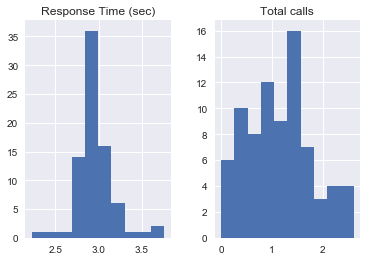

In [31]:
call_response_count_corr_temp.hist()

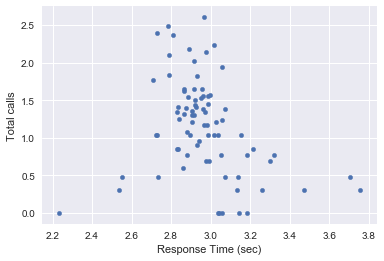

In [32]:
#show image between "Response Time (sec)"" and "Call times"

call_response_count_corr_temp.plot(kind="scatter", x="Response Time (sec)",y="Total calls")

In [33]:
# get corelation between "Total calls" and "Response Time (sec)"
call_response_count_corr_temp.corr()

Response Time (sec)  Total calls
Response Time (sec)             1.000000    -0.278571
Total calls                    -0.278571     1.000000

## Housing data analysis

In [34]:
data_housing =pd.read_csv('housing.csv',delimiter=',')
data_housing.head()

Avg Sale To List Avg Sale To List Mom Avg Sale To List Yoy  Homes Sold  \
0          0.985435               -0.50%               -0.10%           8   
1          0.984077               -0.70%               -0.40%          13   
2          0.987811                1.00%                0.50%          28   
3          1.042150                1.80%                4.60%          24   
4          1.080477                5.40%                9.30%           7   

  Homes Sold Mom Homes Sold Yoy  Inventory Inventory Mom Inventory Yoy  \
0         14.30%         14.30%        9.0        50.00%        28.60%   
1         -7.10%        333.30%       11.0       -26.70%       -26.70%   
2         16.70%        154.50%        5.0       -54.50%       -68.80%   
3         20.00%         33.30%       10.0        -9.10%       -23.10%   
4          0.00%        -12.50%        1.0         0.00%       -92.90%   

   Median Dom                    ...                     Median Dom Yoy  \
0        44.5                    ...                               20.0   
1        18.0                    ...                                0.5   
2        33.0                    ...                              -30.0   
3        17.0                    ...                               -6.0   
4         5.0                    ...                               -2.0   

   Median Sale Price Median Sale Price Mom Median Sale Price Yoy New Listings  \
0              $398K                -7.60%               -33.20%           11   
1              $156K                -0.50%                 9.90%           11   
2              $271K                 8.10%                -1.60%           10   
3              $248K                 1.00%                11.40%           25   
4              $550K                13.40%                69.00%            6   

   New Listings Mom New Listings Yoy  Period End    Property Type  \
0            10.00%          -15.40%   4/30/2018  All Residential   
1            -8.30%          120.00%  12/31/2012  All Residential   
2           -54.50%            0.00%  12/31/2012  All Residential   
3             4.20%           92.30%   7/31/2015  All Residential   
4           -25.00%          -78.60%   7/31/2015  All Residential   

                                     Region  
0           Portland, OR - Sullivan's Gulch  
1  Portland, OR - Lents-Powellhurst-Gilbert  
2                Portland, OR - South Tabor  
3                   Portland, OR - Parkrose  
4                      Portland, OR - Eliot  

[5 rows x 21 columns]

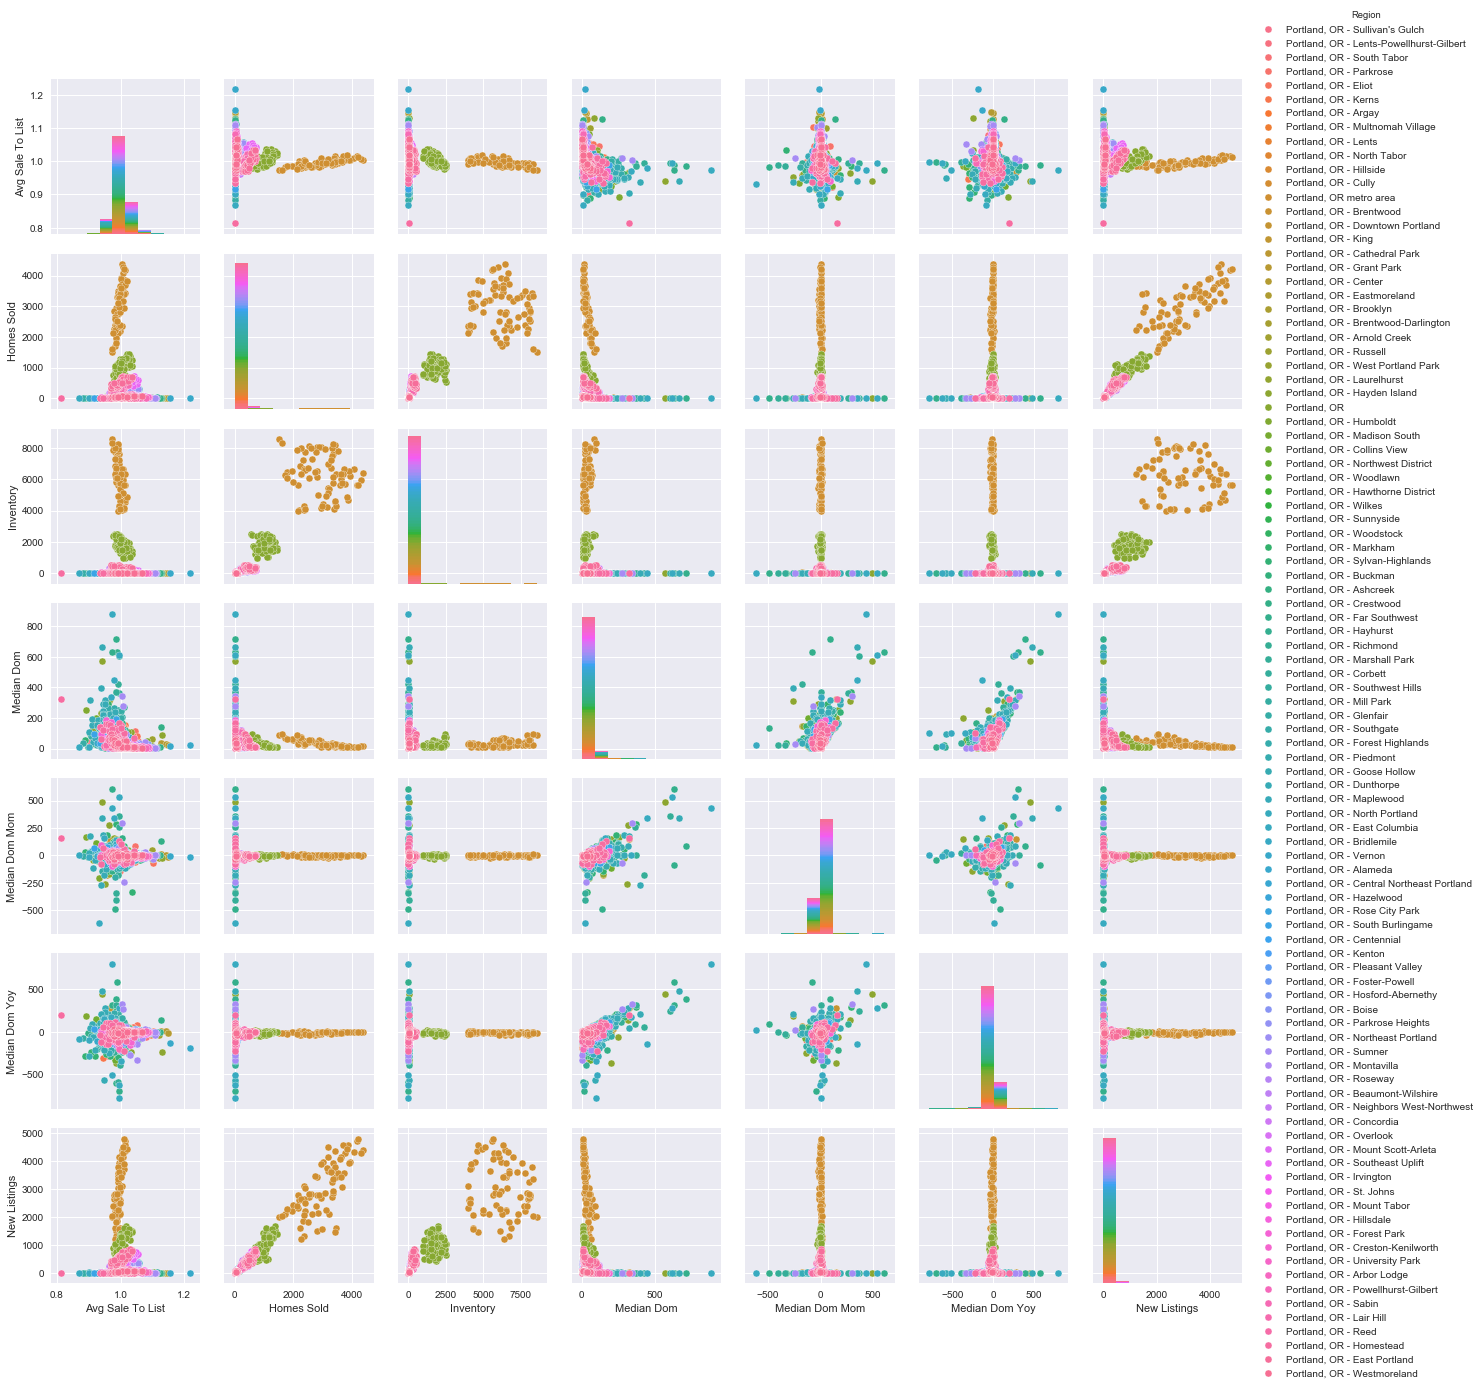

In [35]:
#graph housing base on Region
sns.pairplot(data_housing.dropna().drop_duplicates(), hue='Region');

In [36]:
data_housing.columns.values

array(['Avg Sale To List', 'Avg Sale To List Mom', 'Avg Sale To List Yoy',
       'Homes Sold', 'Homes Sold Mom', 'Homes Sold Yoy', 'Inventory',
       'Inventory Mom', 'Inventory Yoy', 'Median Dom', 'Median Dom Mom',
       'Median Dom Yoy', 'Median Sale Price', 'Median Sale Price Mom',
       'Median Sale Price Yoy', 'New Listings', 'New Listings Mom',
       'New Listings Yoy', 'Period End', 'Property Type', 'Region'],
      dtype=object)

In [37]:
data_housing.shape

#Median Sale Price

(7368, 21)

In [38]:
# clean data
#data_housing_drop = data_housing.dropna().drop_duplicates().sort_values(['Region'])

data_housing_drop = data_housing[data_housing["Median Sale Price"].notnull() | data_housing["Median Sale Price"].notnull()].drop_duplicates().sort_values(["Period End"])


In [39]:
data_housing_drop.shape 

(7368, 21)

In [40]:
# get regions name from housing data
data_housing_reduce=data_housing_drop[['Region',"Median Sale Price","Period End"]].dropna()
data_housing_reduce.shape

(7368, 3)

In [41]:
Regions = data_housing_reduce['Region'].unique()
print("There ar total " ,len(Regions), "Regions in housing data")
Regions

There ar total  97 Regions in housing data


array(['Portland, OR - Hayden Island', 'Portland, OR - Sabin',
       'Portland, OR - Eastmoreland', 'Portland, OR - Wilkes',
       'Portland, OR - Hayhurst', 'Portland, OR - Brooklyn',
       'Portland, OR - Argay', 'Portland, OR - Buckman',
       'Portland, OR - Glenfair', 'Portland, OR - East Columbia',
       'Portland, OR - Cathedral Park',
       'Portland, OR - Hosford-Abernethy',
       'Portland, OR - Mount Scott-Arleta', 'Portland, OR - King',
       'Portland, OR - Parkrose Heights', 'Portland, OR - Overlook',
       'Portland, OR - Eliot', 'Portland, OR - Mount Tabor',
       'Portland, OR - Beaumont-Wilshire',
       'Portland, OR - Forest Highlands', 'Portland, OR - Sumner',
       'Portland, OR - Foster-Powell', 'Portland, OR - Woodlawn',
       'Portland, OR - Creston-Kenilworth', 'Portland, OR - Montavilla',
       'Portland, OR - Southgate', 'Portland, OR - Parkrose',
       'Portland, OR - Centennial', 'Portland, OR - Alameda',
       'Portland, OR - Crestwood', 'P

We can see regions in housing data doesn't match neighborhoods in 911 calls data

In [42]:
#Make change in regions to match neighborhoods name in 911_call
#drop Region  'Portland, OR' and 'Portland, OR metro area' which aare not in neighborhoods
housing_df =data_housing_reduce.copy()
housing_df = housing_df[housing_df.Region !="Portland, OR" ]
housing_df = housing_df[housing_df.Region !="Portland, OR metro area" ]
# remove Portland, OR -
housing_df['Region'] = housing_df['Region'].apply(lambda x: x.replace("Portland, OR - ", ""))
#housing_df.head()
Regions=housing_df['Region'].unique()
print(Regions)

['Hayden Island' 'Sabin' 'Eastmoreland' 'Wilkes' 'Hayhurst' 'Brooklyn'
 'Argay' 'Buckman' 'Glenfair' 'East Columbia' 'Cathedral Park'
 'Hosford-Abernethy' 'Mount Scott-Arleta' 'King' 'Parkrose Heights'
 'Overlook' 'Eliot' 'Mount Tabor' 'Beaumont-Wilshire' 'Forest Highlands'
 'Sumner' 'Foster-Powell' 'Woodlawn' 'Creston-Kenilworth' 'Montavilla'
 'Southgate' 'Parkrose' 'Centennial' 'Alameda' 'Crestwood' 'Arnold Creek'
 'St. Johns' 'Piedmont' 'Brentwood-Darlington' 'Corbett' 'North Portland'
 'Reed' 'Richmond' 'North Tabor' 'Lents-Powellhurst-Gilbert' 'Bridlemile'
 'Rose City Park' 'Hillside' 'East Portland' 'Forest Park'
 'Hawthorne District' 'Center' 'Woodstock' 'Neighbors West-Northwest'
 'Lair Hill' 'Hazelwood' 'University Park' 'Boise' 'Collins View'
 'Powellhurst-Gilbert' 'Brentwood' 'Markham' 'Concordia'
 'Central Northeast Portland' 'Kenton' 'Downtown Portland' 'Irvington'
 'Westmoreland' 'Mill Park' 'South Burlingame' 'Vernon' 'Maplewood'
 'Hillsdale' 'Goose Hollow' 'Multnomah Vi

In [43]:
# in Housing change "Downtown Portland " to "Downtown"
housing_df['Region'] = housing_df['Region'].apply(lambda x: x.replace('Downtown Portland', 'Downtown'))
# in Housing change "Northwest District " to "Northwest"
housing_df['Region'] = housing_df['Region'].apply(lambda x: x.replace('Northwest District', 'Northwest'))
# in Housing change " 'St. Johns'" to "'St Johns'"
housing_df['Region'] = housing_df['Region'].apply(lambda x: x.replace('St. Johns', 'St Johns'))

In [44]:
#find same name for neiborboos and regions
Regions= housing_df["Region"].unique()
neighbor= set(neighborhoods)
region   =set(Regions)
samename = neighbor.intersection(region)
print(str(len(samename)) + " Same name ")
print(samename)

62 Same name 
{'Roseway', 'Foster-Powell', 'Hazelwood', 'Mill Park', 'Montavilla', 'South Tabor', 'Southwest Hills', "Sullivan's Gulch", 'Sylvan-Highlands', 'North Tabor', 'Madison South', 'Beaumont-Wilshire', 'Hillsdale', 'Kenton', 'Goose Hollow', 'Brooklyn', 'Far Southwest', 'Humboldt', 'Maplewood', 'Northwest', 'Hillside', 'Sumner', 'Argay', 'Powellhurst-Gilbert', 'Cathedral Park', 'Hosford-Abernethy', 'Bridlemile', 'Eliot', 'Eastmoreland', 'Centennial', 'Irvington', 'St Johns', 'Reed', 'Hayden Island', 'Parkrose', 'Parkrose Heights', 'Woodstock', 'Grant Park', 'Glenfair', 'Piedmont', 'Boise', 'Concordia', 'Forest Park', 'Cully', 'Laurelhurst', 'King', 'West Portland Park', 'Sunnyside', 'Kerns', 'Richmond', 'Rose City Park', 'Creston-Kenilworth', 'Wilkes', 'Vernon', 'Lents', 'Arbor Lodge', 'University Park', 'Downtown', 'Woodlawn', 'Homestead', 'Brentwood-Darlington', 'Overlook'}


In [45]:
diff1 =neighbor -samename
diff2 =region-samename

In [46]:
print("There are " +str(len(diff1))+ " in neighborhoods, not in regions")
print(diff1)

There are 17 in neighborhoods, not in regions
{'Lloyd', 'Mt Scott-Arleta', 'South Portland', 'Ardenwald', 'Old Town/Chinatown', 'Portsmouth', 'Woodland Park', 'Pearl', 'Buckman West', 'Mt Tabor', 'Sellwood-Moreland', 'Hollywood', 'Linnton', 'Buckman East', 'Arlington Heights', 'Multnomah', 'Northwest Industrial'}


In [47]:
print("There are " +str(len(diff2))+ " in regions, not in neighborhoods ")
print(diff2)

There are 33 in regions, not in neighborhoods 
{'East Portland', 'Center', 'Southgate', 'Mount Scott-Arleta', 'East Columbia', 'Brentwood', 'South Burlingame', 'Marshall Park', 'Neighbors West-Northwest', 'North Portland', 'Hayhurst', 'Mount Tabor', 'Ashcreek', 'Southeast Uplift', 'Hawthorne District', 'Collins View', 'Lents-Powellhurst-Gilbert', 'Sabin', 'Northeast Portland', 'Markham', 'Pleasant Valley', 'Alameda', 'Crestwood', 'Forest Highlands', 'Lair Hill', 'Buckman', 'Westmoreland', 'Central Northeast Portland', 'Dunthorpe', 'Multnomah Village', 'Corbett', 'Russell', 'Arnold Creek'}


In [48]:
#manually merge the name between regions and neighborhood
housing_df['Region'] = housing_df['Region'].apply(lambda x: x.replace("Multnomah Village", "Multnomah"))
housing_df['Region'] = housing_df['Region'].apply(lambda x: x.replace("Mount Tabor", "Mt Tabor"))


In [49]:
housing_df['Region'].unique()

array(['Hayden Island', 'Sabin', 'Eastmoreland', 'Wilkes', 'Hayhurst',
       'Brooklyn', 'Argay', 'Buckman', 'Glenfair', 'East Columbia',
       'Cathedral Park', 'Hosford-Abernethy', 'Mount Scott-Arleta',
       'King', 'Parkrose Heights', 'Overlook', 'Eliot', 'Mt Tabor',
       'Beaumont-Wilshire', 'Forest Highlands', 'Sumner', 'Foster-Powell',
       'Woodlawn', 'Creston-Kenilworth', 'Montavilla', 'Southgate',
       'Parkrose', 'Centennial', 'Alameda', 'Crestwood', 'Arnold Creek',
       'St Johns', 'Piedmont', 'Brentwood-Darlington', 'Corbett',
       'North Portland', 'Reed', 'Richmond', 'North Tabor',
       'Lents-Powellhurst-Gilbert', 'Bridlemile', 'Rose City Park',
       'Hillside', 'East Portland', 'Forest Park', 'Hawthorne District',
       'Center', 'Woodstock', 'Neighbors West-Northwest', 'Lair Hill',
       'Hazelwood', 'University Park', 'Boise', 'Collins View',
       'Powellhurst-Gilbert', 'Brentwood', 'Markham', 'Concordia',
       'Central Northeast Portland', 'Ke

In [80]:
# change Median sale price to integer
housing_df['Median Sale Price'] =housing_df['Median Sale Price'] .apply(lambda x: x.replace("$", "").replace("K","").replace(',','')).astype(int)


Region  Median Sale Price Period End
2175  Hayden Island                235  1/31/2012
7214          Sabin                348  1/31/2012
5298   Eastmoreland                440  1/31/2012
1898         Wilkes                173  1/31/2012
4423       Hayhurst                289  1/31/2012

In [81]:
housing_df['Median Sale Price'] =housing_df['Median Sale Price'] *1000

In [97]:
#The highest Median Sale Price
print(housing_df['Median Sale Price'].max())

2060000


In [82]:
housing_df.head()

Region  Median Sale Price Period End
2175  Hayden Island             235000  1/31/2012
7214          Sabin             348000  1/31/2012
5298   Eastmoreland             440000  1/31/2012
1898         Wilkes             173000  1/31/2012
4423       Hayhurst             289000  1/31/2012

In [83]:
#Check the housing data start and end date
#Start date
housing_df["Period End"].min()

'1/31/2012'

In [84]:
#End date
housing_df["Period End"].max()

'9/30/2017'

In [85]:
# house groupby Region
housing_df_groupbyRegion = housing_df.groupby("Region")

In [86]:
house_sale_median = housing_df_groupbyRegion["Median Sale Price"].mean()

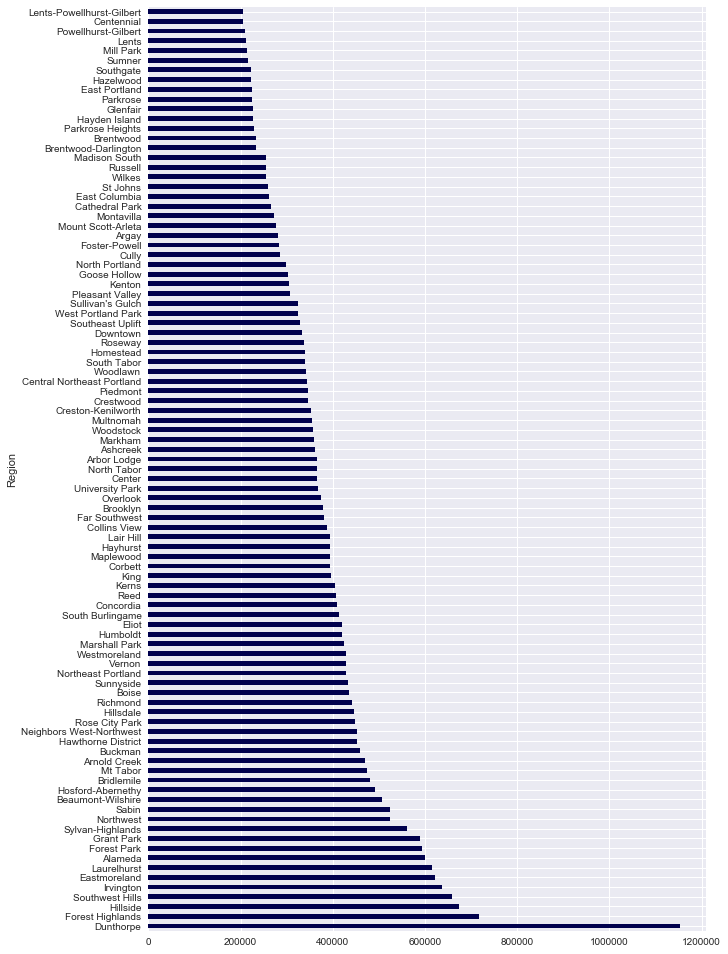

In [91]:
#show average sale price by regions
house_sale_median.sort_values(ascending=False).plot(kind='barh',figsize=(10,17),cmap='seismic')


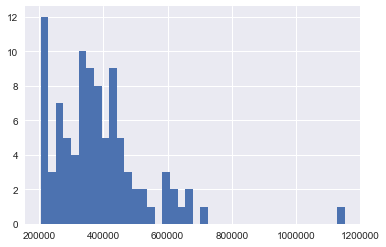

In [96]:
#show hist for house median price
house_sale_median.hist(bins=40)

In [94]:
#use logarithm
#change Series toDataFrame
house_sale_median_log10= pd.DataFrame(house_sale_median)
house_sale_median_log10["Median Sale Price"] = np.log10(house_sale_median_log10["Median Sale Price"])
house_sale_median_log10.head()

Median Sale Price
Region                         
Alameda                5.778751
Arbor Lodge            5.562872
Argay                  5.449255
Arnold Creek           5.670868
Ashcreek               5.558156

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BD85240>]],
      dtype=object)

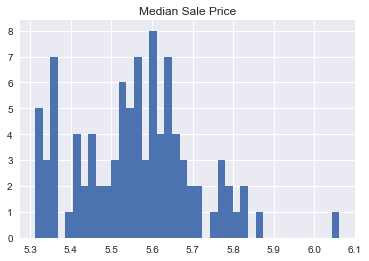

In [95]:
house_sale_median_log10.hist(bins=40)

In [99]:
#rename "Region" to  "Neighborhood"
house_sale_median.index.name= "Neighborhood"
house_sale_median.index.name

'Neighborhood'

In [103]:
#merge housing data  and call_911 data
# from Series to DataFrame
house_sale_median_df=pd.DataFrame(house_sale_median)
result_call_house =pd.merge(call_response_count,house_sale_median_df, on="Neighborhood") 
#call_response_count.head()
result_call_house.head()


Neighborhood  Response Time (min)  Total calls  Median Sale Price
0           Arbor Lodge            12.862381           35      365486.842105
1                 Argay            22.566667            2      281355.263158
2     Beaumont-Wilshire            49.166667            2      507250.000000
3                 Boise            27.264286            7      434421.052632
4  Brentwood-Darlington            18.697222            6      232776.315789

In [108]:
result_call_house_log10 = result_call_house.copy()
result_call_house_log10["Response Time (min)"] =np.log10(result_call_house_log10["Response Time (min)"])
result_call_house_log10["Total calls"] =np.log10(result_call_house_log10["Total calls"])
result_call_house_log10["Median Sale Price"] =np.log10(result_call_house_log10["Median Sale Price"])
result_call_house_log10.head()

Neighborhood  Response Time (min)  Total calls  Median Sale Price
0           Arbor Lodge             1.109321     1.544068           5.562872
1                 Argay             1.353467     0.301030           5.449255
2     Beaumont-Wilshire             1.691671     0.301030           5.705222
3                 Boise             1.435594     0.845098           5.637911
4  Brentwood-Darlington             1.271777     0.778151           5.366939

In [270]:
#Show call times, average response time, average house sale price by neighborhood

#show_result_call_house =result_call_house.set_index("Neighborhood")

#show_result_call_house.sort_values("Median Sale Price", ascending=False).plot(kind='barh',figsize=(10,17),cmap='seismic')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000BBFDCC0>,
      dtype=object)

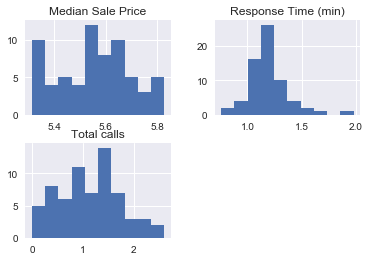

In [111]:
#hist
result_call_house_log10.hist()

In [112]:
#correlation between call time, average response time, average hosue sale price
result_call_house_log10.corr()

Response Time (min)  Total calls  Median Sale Price
Response Time (min)             1.000000    -0.324882          -0.006903
Total calls                    -0.324882     1.000000          -0.383441
Median Sale Price              -0.006903    -0.383441           1.000000

# trimet data analysis
## using events_week data to get lastLocID, base on lastLocID and loction to get Neiborhood for each stop

In [114]:
#get data from events_week
events_week =pd.read_csv('events_week.csv')

In [115]:
#clean data
events_week_drop = events_week.dropna().drop_duplicates()
events_week_drop.head()

bearing  delay            timestamp  lastLocID  lastStopSeq  nextLocID  \
0      110  -1000  2017-01-26 12:15:18       8333            7       8334   
1      109  -1000  2017-01-26 12:19:27       8335            9       8336   
2      357  -1000  2017-01-26 12:22:37       8338           12       8339   
3      359  -1000  2017-01-26 12:23:18       8339           13       8340   
4       90  -1000  2017-01-26 12:26:12       8340           14       8341   

   nextStopSeq           signMessageLong   tripID  vehicle_id  \
0            8  MAX  Red Line to Airport  7104377         217   
1           10  MAX  Red Line to Airport  7104377         217   
2           13  MAX  Red Line to Airport  7104377         217   
3           14  MAX  Red Line to Airport  7104377         217   
4           15  MAX  Red Line to Airport  7104377         217   

   vehicle_location_longitude  vehicle_location_latitude  
0                 -122.681098                  45.518994  
1                 -122.674803                  45.517254  
2                 -122.671347                  45.524104  
3                 -122.671407                  45.525672  
4                 -122.664365                  45.530084

In [173]:
week_df = events_week_drop[["lastLocID",'vehicle_location_longitude','vehicle_location_latitude']]
week_df_groupbylastLocId = week_df.groupby("lastLocID",as_index=False)
#get stop location 
stop_location =week_df_groupbylastLocId.mean()
stop_location.head

<bound method NDFrame.head of      lastLocID  vehicle_location_longitude  vehicle_location_latitude
0         7601                 -122.675527                  45.526338
1         7606                 -122.683082                  45.508821
2         7608                 -122.680410                  45.513552
3         7618                 -122.682196                  45.510279
4         7627                 -122.676240                  45.521219
5         7646                 -122.677977                  45.518000
6         7763                 -122.676495                  45.527953
7         7774                 -122.682029                  45.512771
8         7777                 -122.678587                  45.519198
9         7787                 -122.676586                  45.522816
10        8333                 -122.680957                  45.518957
11        8334                 -122.677923                  45.518147
12        8335                 -122.675312                  

In [174]:
# add one column
stop_location["Neighborhood"] ="Neighborhood"
#stop_location

lastLocID  vehicle_location_longitude  vehicle_location_latitude  \
0         7601                 -122.675527                  45.526338   
1         7606                 -122.683082                  45.508821   
2         7608                 -122.680410                  45.513552   
3         7618                 -122.682196                  45.510279   
4         7627                 -122.676240                  45.521219   
5         7646                 -122.677977                  45.518000   
6         7763                 -122.676495                  45.527953   
7         7774                 -122.682029                  45.512771   
8         7777                 -122.678587                  45.519198   
9         7787                 -122.676586                  45.522816   
10        8333                 -122.680957                  45.518957   
11        8334                 -122.677923                  45.518147   
12        8335                 -122.675312                  45.517419   
13        8336                 -122.673515                  45.517860   
14        8337                 -122.671552                  45.521518   
15        8338                 -122.671349                  45.524174   
16        8339                 -122.671399                  45.525696   
17        8340                 -122.663624                  45.530081   
18        8341                 -122.660882                  45.530076   
19        8342                 -122.656650                  45.530065   
20        8343                 -122.651167                  45.530056   
21        8344                 -122.620033                  45.532591   
22        8345                 -122.601640                  45.529325   
23        8346                 -122.576554                  45.532792   
24        8347                 -122.563729                  45.528961   
25        8348                 -122.550908                  45.522575   
26        8349                 -122.527374                  45.522409   
27        8350                 -122.508295                  45.522260   
28        8351                 -122.492551                  45.522129   
29        8352                 -122.482421                  45.522041   
..         ...                         ...                        ...   
142      13134                 -122.566014                  45.471604   
143      13135                 -122.566606                  45.482204   
144      13136                 -122.565970                  45.493423   
145      13137                 -122.566422                  45.498093   
146      13138                 -122.566083                  45.506093   
147      13139                 -122.564363                  45.515381   
148      13140                 -122.683680                  45.508686   
149      13449                 -122.445357                  45.509752   
150      13450                 -122.440258                  45.507563   
151      13701                 -122.666474                  45.529817   
152      13710                 -122.675127                  45.506197   
153      13711                 -122.670334                  45.502936   
154      13712                 -122.661058                  45.506442   
155      13713                 -122.652774                  45.502465   
156      13714                 -122.648370                  45.495314   
157      13715                 -122.648532                  45.488856   
158      13716                 -122.639556                  45.472820   
159      13717                 -122.636476                  45.459659   
160      13718                 -122.641030                  45.438464   
161      13720                 -122.635165                  45.431120   
162      13721                 -122.639101                  45.442869   
163      13722                 -122.637926                  45.464995   
164      13723                 -122.640573                  45.

In [175]:
# use Nominatim() to get trimet stop stations neighborhoods
geolocator = Nominatim(user_agent="PDX_trimet")


In [176]:
#def a funtion to get neighbourhood name by geolocation 
def neighbourhood(latitude,longitude):
    locString=(latitude,longitude)
#    geolocator = Nominatim(user_agent="name_of_your_app")
    location=geolocator.reverse(locString, timeout=50)
    keys= location.raw['address'].keys()
#    print(location)
    if('neighbourhood' in keys):
       neighbour = location.raw['address']['neighbourhood']
    else:
       neighbour ="NO neighbourhood key"
    
    if("suburb" in keys):
        sub = location.raw['address']['suburb']
    else:
        sub="NO suburb key"
    
    output=[neighbour,sub]
    return output 

In [177]:
#test function
latitude=stop_location['vehicle_location_latitude'][5]
longitude =stop_location['vehicle_location_longitude'][5]
test = neighbourhood(latitude,longitude)


In [178]:
#get the neighborhood name base on the geolocation
neighbour=[]
suburb=[]

for index, row in stop_location.iterrows():
    latitude=row['vehicle_location_latitude']
    longitude =row['vehicle_location_longitude']
    output= neighbourhood(latitude,longitude)
    neighbour.append(output[0])
    suburb.append(output[1]) 

In [179]:
#add column "suburb"
stop_location["Neighborhood"] =neighbour
stop_location["suburb"] =suburb
stop_location.head()

lastLocID  vehicle_location_longitude  vehicle_location_latitude  \
0       7601                 -122.675527                  45.526338   
1       7606                 -122.683082                  45.508821   
2       7608                 -122.680410                  45.513552   
3       7618                 -122.682196                  45.510279   
4       7627                 -122.676240                  45.521219   

           Neighborhood             suburb  
0             Chinatown           Old Town  
1   University District  Portland Downtown  
2   University District  Portland Downtown  
3   University District  Portland Downtown  
4  NO neighbourhood key  Portland Downtown

In [180]:
#Get trimet stop stations neighborname
stop_location_suburb= set(stop_location["suburb"].unique())


In [181]:
print("suburb name for tri_met, total ", len(stop_location_suburb))

suburb name for tri_met, total  38


In [182]:
location_call = set(neighborhoods).intersection(stop_location_suburb)
print(len(location_call), " same  name between tri_met and call_911 neighborhood")
print(location_call)

21  same  name between tri_met and call_911 neighborhood
{'Hazelwood', 'Montavilla', "Sullivan's Gulch", 'Sylvan-Highlands', 'Madison South', 'Goose Hollow', 'Brooklyn', 'Powellhurst-Gilbert', 'Hosford-Abernethy', 'Hollywood', 'Eliot', 'South Portland', 'Eastmoreland', 'Parkrose', 'Glenfair', 'Arlington Heights', 'Rose City Park', 'Lents', 'Arbor Lodge', 'Kenton', 'Overlook'}


In [183]:
np.sort(stop_location["Neighborhood"].unique())

array(['Albina', 'Ardenwald', 'Chinatown', 'Gateway', 'Glencoe Estates',
       "Ladd's Addition", 'Maplewood Park', 'NO neighbourhood key',
       'Russellville', 'Sylvan', 'University District', 'Virginia Place'],
      dtype=object)

In [184]:
#change name "Portland Downtown" to "Downtown"
stop_location["suburb"] =stop_location["suburb"].apply(lambda x: x.replace('Portland Downtown', 'Downtown'))

In [185]:
#change name "Ardenwald-Johnson Creek" to "Ardenwald"
stop_location["suburb"] =stop_location["suburb"].apply(lambda x: x.replace('Ardenwald-Johnson Creek', 'Ardenwald'))

In [186]:
# add  neighborhood column to events_week base the stop_location["suburb"]
# dic for stopId and neighboorhood name
stop_neighborhood={}
for index, row in stop_location.iterrows():
    key=row['lastLocID']
    value =row['suburb']
    stop_neighborhood[key] = value

In [189]:
print(stop_neighborhood)

{7601: 'Old Town', 7606: 'Downtown', 7608: 'Downtown', 7618: 'Downtown', 7627: 'Downtown', 7646: 'Downtown', 7763: 'Old Town', 7774: 'Downtown', 7777: 'Downtown', 7787: 'Downtown', 8333: 'Downtown', 8334: 'Downtown', 8335: 'Downtown', 8336: 'Downtown', 8337: 'Old Town', 8338: 'Old Town', 8339: 'Old Town', 8340: 'Lloyd District', 8341: 'Lloyd District', 8342: 'Lloyd District', 8343: "Sullivan's Gulch", 8344: 'Hollywood', 8345: 'Rose City Park', 8346: 'Madison South', 8347: 'Hazelwood', 8348: 'Hazelwood', 8349: 'Hazelwood', 8350: 'Glenfair', 8351: 'Rockwood', 8352: 'Rockwood', 8353: 'Rockwood', 8354: 'Rockwood', 8355: 'Rockwood', 8356: 'Twelvemile Corner', 8357: 'Twelvemile Corner', 8359: 'Twelvemile Corner', 8360: 'Twelvemile Corner', 8361: 'Twelvemile Corner', 8362: 'Rockwood', 8363: 'Rockwood', 8364: 'Rockwood', 8365: 'Rockwood', 8366: 'Glenfair', 8367: 'Hazelwood', 8368: 'Hazelwood', 8369: 'Hazelwood', 8370: 'Hazelwood', 8371: 'Madison South', 8372: 'Rose City Park', 8373: 'Hollywood

In [162]:
# trimet stopid
events_week_neighborhood= events_week_drop[['lastLocID','signMessageLong','vehicle_location_longitude','vehicle_location_latitude']]

In [167]:
events_week_neighborhood.shape

(234332, 4)

In [190]:

#week_neighborhood=[]
print((stop_neighborhood)) 

{7601: 'Old Town', 7606: 'Downtown', 7608: 'Downtown', 7618: 'Downtown', 7627: 'Downtown', 7646: 'Downtown', 7763: 'Old Town', 7774: 'Downtown', 7777: 'Downtown', 7787: 'Downtown', 8333: 'Downtown', 8334: 'Downtown', 8335: 'Downtown', 8336: 'Downtown', 8337: 'Old Town', 8338: 'Old Town', 8339: 'Old Town', 8340: 'Lloyd District', 8341: 'Lloyd District', 8342: 'Lloyd District', 8343: "Sullivan's Gulch", 8344: 'Hollywood', 8345: 'Rose City Park', 8346: 'Madison South', 8347: 'Hazelwood', 8348: 'Hazelwood', 8349: 'Hazelwood', 8350: 'Glenfair', 8351: 'Rockwood', 8352: 'Rockwood', 8353: 'Rockwood', 8354: 'Rockwood', 8355: 'Rockwood', 8356: 'Twelvemile Corner', 8357: 'Twelvemile Corner', 8359: 'Twelvemile Corner', 8360: 'Twelvemile Corner', 8361: 'Twelvemile Corner', 8362: 'Rockwood', 8363: 'Rockwood', 8364: 'Rockwood', 8365: 'Rockwood', 8366: 'Glenfair', 8367: 'Hazelwood', 8368: 'Hazelwood', 8369: 'Hazelwood', 8370: 'Hazelwood', 8371: 'Madison South', 8372: 'Rose City Park', 8373: 'Hollywood

In [195]:
#add an column to week_event
week_neighborhood=[]
for index, row in events_week_neighborhood.iterrows():
    key = row["lastLocID"]
    if key in stop_neighborhood :
        value=stop_neighborhood[key]
        week_neighborhood.append(value) 
    else:
        week_neighborhood.append("No value for neighborhood")
events_week_neighborhood["suburb"] =  week_neighborhood

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


In [200]:
#def function to get train line name
def changetrainname(x):
    if("Red" in x):
        return "Red Line"
    if("Blue" in x):
        return "Blue Line"
    if("Yellow" in x):
        return "Yellow Line"
    if("Green" in x):
        return "Green Line"
    if("Orange" in x):
        return "Orange Line"
    
    return x

In [201]:
print(events_week_neighborhood["signMessageLong"].unique())

['MAX  Red Line to Airport' 'MAX  Red Line to City Center & Beaverton'
 'MAX  Blue Line to Gresham' 'MAX  Blue Line to Gateway TC'
 'MAX  Blue Line to City Center'
 'MAX  Blue Line to Ruby Junction/E 197th Ave'
 'MAX  Blue Line to Elmonica/170th' 'MAX  Blue Line to Hillsboro'
 'MAX  Blue Line to Rose Qtr'
 'MAX  Blue Line to Willow Creek/SW 185th Ave'
 'MAX  Yellow Line to Expo Center' 'MAX  To City Center'
 'MAX  Yellow Line to City Center/Milwaukie'
 'MAX  Yellow Line to Interstate/Rose Quarter'
 'MAX  Yellow Line to City Center/PSU'
 'MAX  Green Line to Clackamas Town Center'
 'MAX  Green Line to Gateway TC' 'MAX  Green Line to City Center/PSU'
 'MAX  Orange Line to City Center/Expo Center'
 'MAX  Orange Line to City Center/PSU' 'MAX  Orange Line to Milwaukie']


In [202]:
events_week_neighborhood["signMessageLong"] =events_week_neighborhood["signMessageLong"].apply(changetrainname)

C:\Users\maria\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [203]:
#after change name
print(events_week_neighborhood["signMessageLong"].unique())

['Red Line' 'Blue Line' 'Yellow Line' 'MAX  To City Center' 'Green Line'
 'Orange Line']


In [204]:
events_week_neighborhood.head()

lastLocID signMessageLong  vehicle_location_longitude  \
0       8333        Red Line                 -122.681098   
1       8335        Red Line                 -122.674803   
2       8338        Red Line                 -122.671347   
3       8339        Red Line                 -122.671407   
4       8340        Red Line                 -122.664365   

   vehicle_location_latitude          suburb  
0                  45.518994        Downtown  
1                  45.517254        Downtown  
2                  45.524104        Old Town  
3                  45.525672        Old Town  
4                  45.530084  Lloyd District

In [205]:
# group by signMessageLong
week_groupbysignMessageLong =events_week_neighborhood.groupby(["signMessageLong",'suburb'])

In [206]:
week_groupbysignMessageLong["lastLocID"].count()

signMessageLong  suburb           
Blue Line        Arlington Heights     1055
                 Central Beaverton     6849
                 Downtown              7817
                 Elmonica              3607
                 Glenfair              2610
                 Goose Hollow          6853
                 Hazelwood             9155
                 Hollywood             2511
                 Huber                 3317
                 Lloyd District        8822
                 Madison South         2505
                 NO suburb key        11241
                 Old Town              5310
                 Orenco                8065
                 Rockwood             11412
                 Rose City Park        2503
                 Sullivan's Gulch      1228
                 Sylvan-Highlands      1232
                 Triple Creek          2280
                 Twelvemile Corner     6868
Green Line       Battin                 866
                 Downtown              80

In [207]:
# group by suburb first
week_groupbysuburb =events_week_neighborhood.groupby(['suburb',"signMessageLong"])
week_groupbysuburb.groups.keys()

dict_keys([('Arbor Lodge', 'Yellow Line'), ('Arlington Heights', 'Blue Line'), ('Arlington Heights', 'Red Line'), ('Battin', 'Green Line'), ('Brooklyn', 'Orange Line'), ('Central Beaverton', 'Blue Line'), ('Central Beaverton', 'Red Line'), ('Downtown', 'Blue Line'), ('Downtown', 'Green Line'), ('Downtown', 'MAX  To City Center'), ('Downtown', 'Orange Line'), ('Downtown', 'Red Line'), ('Downtown', 'Yellow Line'), ('Eastmoreland', 'Orange Line'), ('Eliot', 'Yellow Line'), ('Elmonica', 'Blue Line'), ('Elmonica', 'Red Line'), ('Glenfair', 'Blue Line'), ('Goose Hollow', 'Blue Line'), ('Goose Hollow', 'Red Line'), ('Harmony', 'Green Line'), ('Harmony Point', 'Green Line'), ('Hazelwood', 'Blue Line'), ('Hazelwood', 'Green Line'), ('Hazelwood', 'Red Line'), ('Hollywood', 'Blue Line'), ('Hollywood', 'Green Line'), ('Hollywood', 'Red Line'), ('Hosford-Abernethy', 'Orange Line'), ('Huber', 'Blue Line'), ('Huber', 'Red Line'), ('Kellogg Park', 'Orange Line'), ('Kenton', 'Yellow Line'), ('Lents', '

In [208]:
# show neighborhood and train line
week_groupbysuburb["lastLocID"].count()

suburb               signMessageLong    
Arbor Lodge          Yellow Line             3875
Arlington Heights    Blue Line               1055
                     Red Line                 888
Battin               Green Line               866
Brooklyn             Orange Line             2928
Central Beaverton    Blue Line               6849
                     Red Line                1254
Downtown             Blue Line               7817
                     Green Line              8016
                     MAX  To City Center       89
                     Orange Line             7813
                     Red Line                5531
                     Yellow Line             4611
Eastmoreland         Orange Line             2925
Eliot                Yellow Line             1940
Elmonica             Blue Line               3607
                     Red Line                 137
Glenfair             Blue Line               2610
Goose Hollow         Blue Line               6853
         

In [209]:
event_nei_sign = events_week_neighborhood[["signMessageLong","suburb"]]
train_neighborhood = event_nei_sign.dropna().drop_duplicates()
train_neighborhood

signMessageLong               suburb
0                  Red Line             Downtown
2                  Red Line             Old Town
4                  Red Line       Lloyd District
7                  Red Line     Sullivan's Gulch
8                  Red Line            Hollywood
9                  Red Line       Rose City Park
10                 Red Line        Madison South
11                 Red Line         Goose Hollow
13                 Red Line    Central Beaverton
14                 Red Line        NO suburb key
16                 Red Line    Arlington Heights
17                 Red Line             Parkrose
34                 Red Line            Hazelwood
13148              Red Line     Sylvan-Highlands
23904             Blue Line    Twelvemile Corner
23922              Red Line                Huber
23926              Red Line             Elmonica
24066             Blue Line             Downtown
24070             Blue Line             Old Town
24073             Blue Line       Lloyd District
24076             Blue Line     Sullivan's Gulch
24077             Blue Line            Hollywood
24078             Blue Line       Rose City Park
24079             Blue Line        Madison South
24080             Blue Line            Hazelwood
24083             Blue Line             Glenfair
24084             Blue Line             Rockwood
24091             Blue Line         Goose Hollow
24093             Blue Line    Central Beaverton
24094             Blue Line                Huber
...                     ...                  ...
91200           Yellow Line             Overlook
91202           Yellow Line          Arbor Lodge
91204           Yellow Line               Kenton
91372           Yellow Line             Old Town
91373           Yellow Line             Downtown
92400   MAX  To City Center             Old Town
92401   MAX  To City Center             Downtown
106908           Green Line            Hazelwood
106910           Green Line           Montavilla
106911           Green Line  Powellhurst-Gilbert
106912           Green Line                Lents
106916           Green Line        Harmony Point
107148           Green Line             Old Town
107149           Green Line             Downtown
107151           Green Line       Lloyd District
107154           Green Line     Sullivan's Gulch
107155           Green Line            Hollywood
107156           Green Line       Rose City Park
107157           Green Line        Madison South
119564           Green Line              Harmony
119565           Green Line               Battin
131563          Orange Line    Milwaukie Heights
131564          Orange Line      Waverly Heights
131565          Orange Line         Eastmoreland
131567          Orange Line             Brooklyn
131568          Orange Line    Hosford-Abernethy
131571          Orange Line             Downtown
137699          Orange Line             Old Town
137707          Orange Line       South Portland
137712          Orange Line         Kellogg Park

[70 rows x 2 columns]

In [210]:
train_neighborhood = train_neighborhood.rename(index=str,columns={"suburb": "Neighborhood"})
train_neighborhood.head()

signMessageLong      Neighborhood
0        Red Line          Downtown
2        Red Line          Old Town
4        Red Line    Lloyd District
7        Red Line  Sullivan's Gulch
8        Red Line         Hollywood

In [252]:
#base on Neighborhood merge all data

result_merge_all = pd.merge(result_call_house,train_neighborhood,on="Neighborhood")
result_merge_all.head()

Neighborhood  Response Time (min)  Total calls  Median Sale Price  \
0  Arbor Lodge            12.862381           35      365486.842105   
1     Brooklyn            12.155159           42      377828.947368   
2     Downtown            10.158885          302      332921.052632   
3     Downtown            10.158885          302      332921.052632   
4     Downtown            10.158885          302      332921.052632   

  signMessageLong  
0     Yellow Line  
1     Orange Line  
2        Red Line  
3       Blue Line  
4     Yellow Line

In [253]:


result_merge_all.head()
result_drop = result_merge_all.drop(["Neighborhood"], axis=1)

result_groupbyline = result_merge_all.groupby("signMessageLong")
print(type(result_groupbyline))
result_drop.head()
finalResult_Median =result_groupbyline["Median Sale Price"].mean()
#finalResult.head()

<class 'pandas.core.groupby.groupby.DataFrameGroupBy'>


In [254]:
finalResult_Median.head()

signMessageLong
Blue Line              333741.776316
Green Line             284110.197368
MAX  To City Center    332921.052632
Orange Line            456092.105263
Red Line               333605.263158
Name: Median Sale Price, dtype: float64

In [266]:
# show average sale price by train line
finalResult_Call = result_groupbyline["Total calls"].sum()
finalResult_Call

signMessageLong
Blue Line              1037
Green Line             1144
MAX  To City Center     302
Orange Line             388
Red Line               1113
Yellow Line             627
Name: Total calls, dtype: int64

In [267]:
#total calls and house median sale price

finalResult= pd.DataFrame(finalResult_Median)
finalResult["Total calls"] = finalResult_Call


In [268]:
finalResult

Median Sale Price  Total calls
signMessageLong                                    
Blue Line                333741.776316         1037
Green Line               284110.197368         1144
MAX  To City Center      332921.052632          302
Orange Line              456092.105263          388
Red Line                 333605.263158         1113
Yellow Line              359244.736842          627

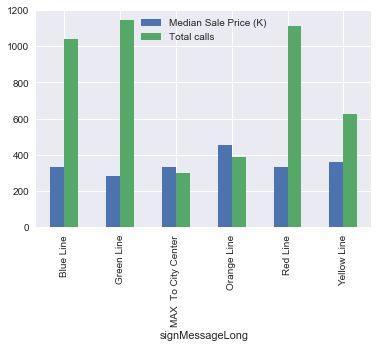

In [269]:
#show the result
finalResult["Median Sale Price"] = finalResult["Median Sale Price"] /1000
finalResult =finalResult.rename(index=str,columns={"Median Sale Price": "Median Sale Price (K)"})
finalResult.plot(kind='bar')
plt.show()

#  09/09/2017 - 01/01/2018  Green line seems have had the greatest number of calls of all lines. The Oregon line has the highest average house sale price in all neighborhoods that have trimet. The correclation between average house median sale price and total 911 calls is  -0.3834